<h1>A neural network from scratch in numpy</h1>
<p>A simple dense neural network.</p>

In [1]:
import numpy as np
from numpy.matlib import repmat
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

from helpel import *

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.4


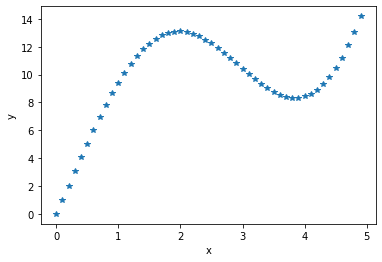

In [2]:
X, y = generate_data() # this func is from Cornel course

plt.plot(X[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
def init_weights(specs):
    """
    Inputs:
    List of ints that specifies the input size, layer size, and output shape.
    Outputs:
    A list of np arrays containing the weights for each layer.
    """
    return [np.random.randn(cur, nex) for cur, nex in zip(specs[:-1], specs[1:])]

In [4]:
def ReLU(x):
    #Returns value if x is greater than 0, 0 otherwise.
    return np.maximum(x,0)

In [5]:
def ReLU_grad(x):
    #Returns 1 if value is greate than 0, 0 otherwise.
    return (x > 0).astype('float64')

In [38]:
def forward_pass(W, xTr):
    """
    function forward_pass(weights,xTr)
    
    INPUT:
    W - an array of L weight matrices
    xTr - nxd matrix. Each row is an input vector
    
    OUTPUTS:
    A - a list of matrices (of length L) that stores result of matrix multiplication at each layer 
    Z - a list of matrices (of length L) that stores result of transition function at each layer 
    """
    
    # Initialize A and Z
    A = [xTr]
    Z = [xTr]
    
    for layerW, layerZ in zip(W[:-1], Z):
        A_next = layerZ @ layerW
        Z_next = ReLU(A_next)

        A.append(A_next)
        Z.append(Z_next)

    A_final = Z[-1] @ W[-1]

    A.append(A_final)
    Z.append(A_final)

    return A, Z

In [7]:
def MSE(out, y):
    """
    INPUT:
    out: output of network (n vector)
    y: training labels (n vector)
    
    OUTPUTS:
    
    loss: the mse loss (a scalar)
    """
    
    n = len(y)
    sq_error = (out - y)**2
    loss = np.sum(sq_error)/n
    
    return loss

In [8]:
def MSE_grad(out, y):
    """
    INPUT:
    out: output of network (n vector)
    y: training labels (n vector)
    
    OUTPUTS:
    
    grad: the gradient of the MSE loss with respect to out (nx1 vector)
    """
    
    n = len(y)
    grad = np.zeros(n)

    grad = (2/n) * (out-y)

    return grad

In [50]:
def backprop(W, A, Z, y):
    """
    
    INPUT:
    W weights
    A output of forward pass
    Z output of forward pass (cell array)
    y vector of size n (each entry is a label)
    
    OUTPUTS:
    
    gradient = the gradient with respect to W as a cell array of matrices
    """
    
    # Convert delta to a row vector to make things easier
    delta = (MSE_grad(Z[-1].flatten(), y) * 1).reshape(-1, 1)

    # compute gradient with backprop
    gradients = []
    
    for layer in range(len(W) - 1, -1, -1):
        
        grad = (delta.T @ Z[layer]).T
        delta = ReLU_grad(A[layer]) * (W[layer] @ delta.T).T

        gradients.append(grad)
    
    gradients.reverse()
    
    return gradients

Elapsed time: 9.55s


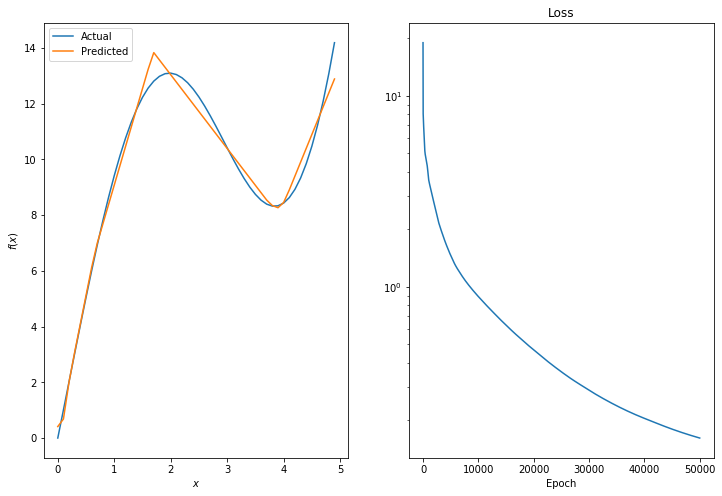

In [57]:
# learning rate for Gradient Descent
lr = 0.0001

# Number of epochs
# one epoch - one full pass through the dataset
M = 50000

# keep track of the losses
losses = np.zeros(M)
t0 = time.time()

# initialize a neural network with one hidden layer 
# Try varying the depth and width of the neural networks to see the effect

W = init_weights([2, 10, 10, 1])

# Start training
for i in range(M):
    
    # Do a forward pass
    A, Z = forward_pass(W, X)
    
    # Calculate the loss
    losses[i] = MSE(Z[-1].flatten(), y)
    
    # Calculate the loss using backprop
    gradients = backprop(W, A, Z, y)
    
    # Update he parameters
    for j in range(len(W)):
        W[j] -= lr * gradients[j]""
t1 = time.time()
print('Elapsed time: %.2fs' % (t1-t0))
plot_results(X[:, 0], y, Z, losses) # plot results is also a cornell written function